# Predicting Stock Prices with ML

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [3]:
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [4]:
start_date=datetime.date(2009,3,8)
end_date=datetime.date(2019,8,3)
data=pd.read_csv('sap_stock.csv')
data.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [5]:
data.info

<bound method DataFrame.info of             Date   Open   High    Low   Close  Change  Traded Volume  \
0     2009-03-09  25.16  25.82  24.48  25.590     NaN      5749357.0   
1     2009-03-10  25.68  26.95  25.68  26.870     NaN      7507770.0   
2     2009-03-11  26.50  26.95  26.26  26.640     NaN      5855095.0   
3     2009-03-12  26.15  26.47  25.82  26.180     NaN      6294955.0   
4     2009-03-13  26.01  26.24  25.65  25.730     NaN      6814568.0   
5     2009-03-16  26.22  26.66  25.94  26.480     NaN      5248247.0   
6     2009-03-17  26.39  26.49  25.97  26.330     NaN      4760668.0   
7     2009-03-18  26.86  27.00  26.34  26.870     NaN      4798820.0   
8     2009-03-19  27.50  27.99  27.38  27.630     NaN     10124086.0   
9     2009-03-20  27.70  27.90  27.12  27.430     NaN      7357799.0   
10    2009-03-23  27.60  27.75  26.74  27.220     NaN      5798061.0   
11    2009-03-24  27.44  27.91  27.28  27.590     NaN      4803756.0   
12    2009-03-25  27.45  27.98  

In [6]:
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


In [7]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover', 'Last Price of the Day', 'Daily Traded Units',
       'Daily Turnover'],
      dtype='object')

In [8]:
df=pd.DataFrame(data,columns=['Date','Close'])
df.head()

,Date,Close
0,2009-03-09,25.59
1,2009-03-10,26.87
2,2009-03-11,26.64
3,2009-03-12,26.18
4,2009-03-13,25.73


In [9]:
df.info

<bound method DataFrame.info of             Date   Close
0     2009-03-09  25.590
1     2009-03-10  26.870
2     2009-03-11  26.640
3     2009-03-12  26.180
4     2009-03-13  25.730
5     2009-03-16  26.480
6     2009-03-17  26.330
7     2009-03-18  26.870
8     2009-03-19  27.630
9     2009-03-20  27.430
10    2009-03-23  27.220
11    2009-03-24  27.590
12    2009-03-25  27.490
13    2009-03-26  27.650
14    2009-03-27  26.750
15    2009-03-30  25.990
16    2009-03-31  26.680
17    2009-04-01  27.000
18    2009-04-02  27.710
19    2009-04-03  27.600
20    2009-04-06  27.650
21    2009-04-07  27.770
22    2009-04-08  28.420
23    2009-04-09  29.010
24    2009-04-10  29.005
25    2009-04-13  29.005
26    2009-04-14  29.250
27    2009-04-15  29.390
28    2009-04-16  29.330
29    2009-04-17  29.440
...          ...     ...
2520  2019-01-28  92.360
2521  2019-01-29  89.810
2522  2019-01-30  88.830
2523  2019-01-31  90.250
2524  2019-02-01  90.790
2525  2019-02-04  90.970
2526  2019-02-05  

In [10]:
# check for missing values
df.isna().values.any()

False

# Exploring the Data

In [11]:
import matplotlib.dates as mdates
years=mdates.YearLocator()
myears=mdates.DateFormatter('%Y')

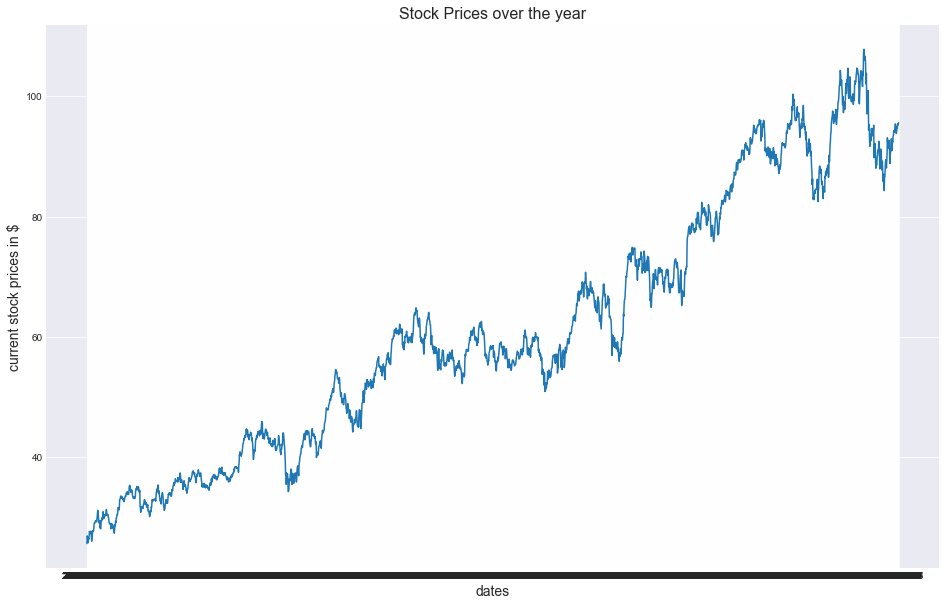

In [12]:
fig,ax=plt.subplots()
ax.plot(df['Date'],df['Close'])

plt.title('Stock Prices over the year',fontsize=16)
plt.xlabel('dates',fontsize=14)
plt.ylabel('current stock prices in $',fontsize=14)
plt.show()

# Training a Linear regression Model

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
train,test=train_test_split(df,test_size=0.20)

In [15]:
y_train=train['Close']
x_train=np.array(train.index).reshape(-1,1)

In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
x_test=np.array(test.index).reshape(-1,1)
y_test=test['Close']

In [18]:
y_pred=model.predict(x_test)

In [19]:
print(y_pred)

[73.70549391 56.56333189 94.95955218 79.95668752 69.92699467 76.4560191
 37.7541849  43.81089693 45.47788189 60.75857738 61.50872061 51.59016008
 39.86569919 79.48437511 57.89691986 69.09350218 52.81261572 39.8379161
 26.97434881 37.78196798 63.70358414 61.48093753 88.04156459 73.14983226
 26.58538566 56.28550106 37.05960783 51.70129242 61.56428677 26.86321648
 34.58691347 37.22630633 61.81433452 46.00576046 37.25408941 84.81872699
 66.53745858 65.31500294 37.14295708 31.39185896 61.8421176  63.89806572
 52.11803866 44.08872776 45.50566497 75.70587587 35.97606761 68.51005745
 35.80936911 25.69632701 91.12548676 50.70110144 83.31844053 87.98599842
 29.69709092 79.20654429 78.0674379  50.06209054 31.53077438 35.72601986
 63.48131948 86.95802436 77.06724692 64.34259504 43.86646309 52.78483264
 44.64438941 64.03698113 36.03163377 39.67121761 45.31118339 87.56925218
 95.12625067 34.6980458  67.89882963 38.94885746 62.73117625 33.19775934
 36.19833227 47.78387776 80.67904767 74.17780632 70.5

In [20]:
df.shape

(2550, 2)

In [22]:
# generating 25 random integers

randints=np.random.randint(2550,size=25)

df_min=df[df.index.isin(randints)]
df_min.head()

,Date,Close
1,2009-03-10,26.87
146,2009-09-29,33.17
265,2010-03-15,33.44
327,2010-06-11,36.30
329,2010-06-15,36.70


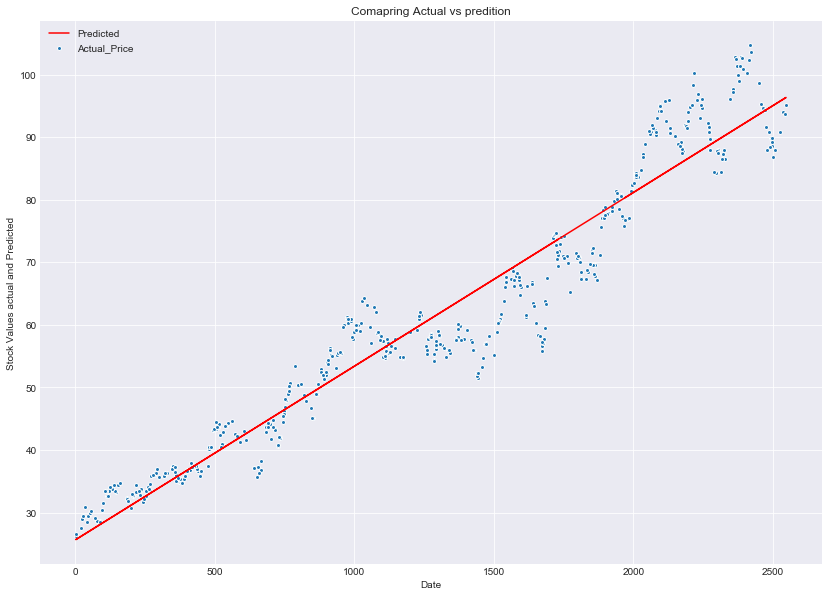

In [24]:
plt.figure(1,figsize=(14,10))
plt.title('Comapring Actual vs predition')
plt.scatter(x_test,y_test,edgecolor='w',label='Actual_Price')
plt.plot(x_test,y_pred,color='r',label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Values actual and Predicted')
plt.legend()
plt.show()